# Генеративно-состязательная сеть для синтеза ЭКГ

### Описание второй части диплома:

Во второй части дипломной работы была реализована модель генеративной состязательной сети (GAN) для синтеза кардиограммы с использованием данных из набора MIT-BIH Arrhythmia Database. Модель была обучена для создания синтетических сигналов ЭКГ, которые бы имитировали реальные данные для различных типов аритмий. Конкретно в этой части работы был рассмотрен класс "Слияние желудочкового и нормального сокращения".

**Основные этапы работы во второй части:**

1. **Предобработка данных**:
   - Загружены и объединены тренировочные и тестовые данные из CSV файлов.
   - Произведено преобразование столбцов данных для назначения метки класса аритмии.
   - В качестве меток были использованы следующие значения:
     - "Норма"
     - "Преждевременное сокращение предсердия"
     - "Преждевременное сокращение желудочков"
     - "Слияние желудочкового и нормального сокращения"
     - "Слияние стимулированного и нормального сокращения"
   
2. **Создание датасета**:
   - Для обучения модели был создан кастомный датасет `ECGDataset`, который подготавливает данные для подачи в модель, извлекая данные ЭКГ-сигнала и соответствующие метки классов.

3. **Разработка модели GAN**:
   - В этой части работы была построена модель GAN, состоящая из двух основных компонентов:
     - **Генератор**: Создает синтетические данные ЭКГ-сигналов, используя LSTM слой для обработки временных зависимостей.
     - **Дискриминатор**: Оценивает реальные ли данные подаются на вход, или это синтетические данные, созданные генератором.
   
4. **Процесс обучения**:
   - Обучение проводилось с использованием метода оптимизации Adam с бинарной кросс-энтропийной потерей (BCELoss), которая помогает обучать модель различать реальные и синтетические данные.
   - Для улучшения работы модели применялись методы регуляризации, такие как dropout.
   
5. **Оценка и визуализация результатов**:
   - В конце процесса обучения были сохранены параметры генератора и дискриминатора.
   - Было проведено сравнение синтетических сигналов с реальными сигналами для класса "Слияние желудочкового и нормального сокращения", с использованием случайно выбранных данных из тестового набора.
   - Результаты были визуализированы на графиках, где отображались как реальные, так и синтетические сигналы ЭКГ.
   - Визуализация позволила наглядно продемонстрировать эффективность генератора в создании правдоподобных синтетических данных ЭКГ.

**Результаты**:
- Для выбранного класса "Слияние желудочкового и нормального сокращения" было проведено сравнение между реальными и синтетическими сигналами. Полученные синтетические данные были достаточно похожи на настоящие, что подтверждает успешность модели в генерации реалистичных кардиограмм.
  
**Заключение**:
Вторая часть дипломной работы продемонстрировала применение генеративных состязательных сетей (GAN) для создания синтетических данных ЭКГ, что может быть полезным в медицинской области для создания дополнительных тренировочных данных, которые сложно получить в реальных условиях. Модель показала хорошие результаты при генерации синтетических данных для конкретного типа аритмии, что открывает перспективы для дальнейшего улучшения моделей генерации и их применения в задачах диагностики.

 # Простыми словами

 Во второй части диплома была разработана модель, которая генерирует синтетические ЭКГ-сигналы, имитирующие реальные данные, используя генеративную состязательную сеть (GAN). Это важно, потому что такие синтетические данные могут быть использованы для обучения других моделей, когда реальных данных недостаточно.

Вот что было сделано:

1. **Обработка данных**:
   - Загружены и объединены данные о кардиограммах, которые затем были подготовлены для обучения модели. Каждый сигнал ЭКГ был помечен как один из типов аритмий, например, "Норма" или "Слияние желудочкового и нормального сокращения".

2. **Модель GAN**:
   - **Генератор** — создаёт синтетические данные ЭКГ, которые выглядят как настоящие.
   - **Дискриминатор** — проверяет, насколько правдоподобны эти синтетические данные, сравнивая их с реальными.

3. **Процесс обучения**:
   - Модель обучалась на данных, и использовалась функция потерь, которая помогала улучшать качество синтетических сигналов.
   - Применялись методы регуляризации, чтобы предотвратить переобучение.

4. **Оценка и сравнение**:
   - После обучения были сгенерированы синтетические сигналы, которые сравнивались с реальными. На графиках можно было увидеть, что синтетические данные очень похожи на настоящие.

**Результаты**:
Модель успешно создавала синтетические ЭКГ-сигналы для конкретного типа аритмии. Эти данные можно использовать для тренировки других моделей в медицине, где реальные данные трудно получить.

В итоге, работа показала, как с помощью GAN можно генерировать реалистичные медицинские данные, что полезно для создания новых алгоритмов и диагностики.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mitbih_train.csv to mitbih_train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mitbih_test.csv to mitbih_test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ptbdb_abnormal.csv to ptbdb_abnormal.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ptbdb_normal.csv to ptbdb_normal.csv


In [ ]:
import os
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW, Adam

Этот код отвечает за настройку конфигурации и установку начальных значений для воспроизводимости экспериментов с нейронными сетями. Давайте разберемся его шаги:

### 1. **Определение класса `Config`**:
Класс `Config` используется для хранения конфигурационных настроек, которые будут использоваться в дальнейшем в коде. В данном случае он содержит следующие параметры:
- **`csv_path`**: Путь к файлу CSV (пока пустой). Это место, куда будет сохраняться или откуда будут загружаться данные.
- **`seed`**: Число, которое используется для установки начальных значений генераторов случайных чисел. Это важно для того, чтобы результаты экспериментов были воспроизводимыми, т.е. чтобы при одинаковых условиях модель всегда давала одинаковый результат.
- **`device`**: Определяет, на каком устройстве будет выполняться код. Если доступна видеокарта с поддержкой CUDA, то будет использовано устройство с индексом `0` (первая видеокарта). Если CUDA не доступна, то модель будет работать на процессоре (CPU).

### 2. **Функция `seed_everything(seed: int)`**:
Эта функция гарантирует, что случайные числа, генерируемые библиотеками, будут одинаковыми на каждом запуске, что позволяет воспроизводить результаты. Важно использовать такую функцию при обучении нейронных сетей, чтобы убедиться, что все случайные операции (например, инициализация весов, разбиение на тренировочные/тестовые данные и т.д.) дают одинаковые результаты при каждом запуске. Эта функция выполняет следующие шаги:
- **`np.random.seed(seed)`**: Устанавливает начальное значение для генератора случайных чисел в `numpy`, чтобы случайные операции, такие как перемешивание данных, были одинаковыми.
- **`torch.manual_seed(seed)`**: Устанавливает начальное значение для генератора случайных чисел в PyTorch, что важно для воспроизводимости нейронных сетей.
- **`torch.cuda.manual_seed(seed)`**: Если используется GPU, этот шаг устанавливает начальное значение для генератора случайных чисел на видеокарте.

### 3. **Настройка конфигурации и установка начального значения**:
- Создается объект `config`, который будет хранить настройки для работы модели (например, путь к файлу и параметры устройства).
- Вызов `seed_everything(config.seed)` применяет установку начальных значений для случайных чисел с использованием заданного в конфигурации seed. Это важно для воспроизводимости результатов.

### Итог:
Этот блок кода устанавливает конфигурацию для работы модели, а также гарантирует, что эксперимент будет воспроизводимым. Важно при обучении нейронных сетей, чтобы результаты не менялись при каждом запуске кода (если все остальные условия одинаковы).

In [ ]:
class Config:
    csv_path = ''
    seed = 2021
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

def seed_everything(seed: int):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

config = Config()
seed_everything(config.seed)

Этот код настраивает начальные параметры для работы программы и делает так, чтобы результаты экспериментов всегда были одинаковыми, даже если запустить их несколько раз.

1. **`Config`** — это класс, в котором хранятся настройки программы. В нем указано:
   - Где находятся данные (пока пустое место для пути к файлу).
   - Какой случайный "ключ" будет использоваться для всех случайных операций (это важно для повторяемости экспериментов).
   - На каком устройстве будет работать программа: на видеокарте (если она есть) или на процессоре.

2. **`seed_everything`** — функция, которая заставляет программу использовать тот же случайный "ключ" каждый раз. Это нужно для того, чтобы результаты всегда были одинаковыми, например, при обучении модели. Если не использовать такую функцию, то каждый раз результаты могут меняться, даже если все условия те же.

В итоге, этот код помогает сделать работу модели стабильной и воспроизводимой.

In [ ]:
df_ptbdb = pd.read_csv('ptbdb_abnormal.csv')
df_mitbih = pd.read_csv('mitbih_train.csv')
df_ptbdb.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
df_mitbih_test = pd.read_csv('mitbih_test.csv', header=None)
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'class'}, inplace=True)

id_to_label = {
    0: "Норма",
    1: "Преждевременное сокращение предсердия",
    2: "Преждевременное сокращение желудочков",
    3: "Слияние желудочкового и нормального сокращения",
    4: "Слияние стимулированного и нормального сокращения"
}
df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)
print(df_mitbih.info())

<class 'pandas.core.frame.DataFrame'>
Index: 109446 entries, 0 to 21891
Columns: 189 entries, 0 to label
dtypes: float64(188), object(1)
memory usage: 158.7+ MB
None


In [ ]:
df_mitbih.to_csv('data.csv', index=False)
config.csv_path = 'data.csv'

# Первичный анализ данных

In [ ]:
df_mitbih['label'].value_counts()

,count
label,
Норма,90589
Слияние стимулированного и нормального сокращения,8039
Преждевременное сокращение желудочков,7236
Преждевременное сокращение предсердия,2779
Слияние желудочкового и нормального сокращения,803


<ipython-input-14-c5781e776a16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-14-c5781e776a16>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15);


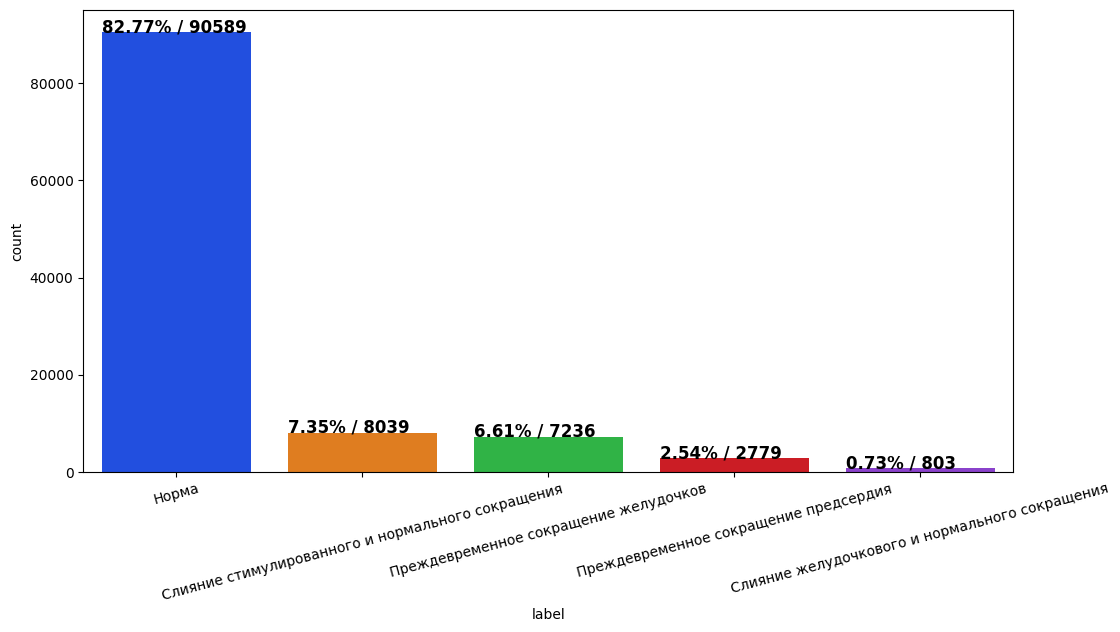

In [ ]:
percentages = [count / df_mitbih.shape[0] * 100 for count in df_mitbih['label'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=df_mitbih['label'],
    ax=ax,
    palette="bright",
    order=df_mitbih['label'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    df_mitbih['label'].value_counts(sort=True).values,
    ax.patches):

    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')

plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

# Набор данных

В данном коде создается класс `ECGDataset`, который наследует `Dataset` из библиотеки PyTorch, а также функция для получения даталоадера для выборки с определенной меткой. Описание шагов:

### 1. **Создание класса `ECGDataset`**:
   Этот класс является подклассом `torch.utils.data.Dataset` и используется для создания датасета, который будет подаваться в модель для обучения.

   - **`__init__(self, df)`** — инициализация объекта. В этом методе:
     - `self.df` — сохраняются данные, переданные в класс.
     - `self.data_columns` — список всех столбцов данных, кроме последних двух, которые содержат метки классов и возможно другие служебные данные.

   - **`__getitem__(self, idx)`** — этот метод позволяет извлекать данные по индексу `idx`. Для каждого индекса:
     - Получается сигнал ЭКГ, который находится в строках DataFrame, преобразуется в тип `float32` и затем преобразуется в тензор PyTorch (`torch.FloatTensor`).
     - Метка класса для текущего сигнала (из столбца 'class') преобразуется в тензор типа `LongTensor` и возвращается.
   
   - **`__len__(self)`** — возвращает длину датасета (количество строк в DataFrame).

### 2. **Функция `get_dataloader`**:
   Эта функция используется для создания даталоадера на основе выбранного имени метки (`label_name`) и размера батча (`batch_size`).

   - **Чтение данных**: Данные загружаются с помощью `pd.read_csv(config.csv_path)`. Затем фильтруются по метке (например, 'Преждевременное сокращение предсердия') с помощью `df.loc[df['label'] == label_name]`.
   - **Создание объекта `ECGDataset`**: На основе отфильтрованного DataFrame создается объект `ECGDataset`.
   - **Создание `DataLoader`**: Даталоадер создается для пакетов данных размером `batch_size`, и `num_workers=0` указывает, что данные будут загружаться в основном потоке.

### 3. **Получение даталоадера**:
   - `dataloader = get_dataloader(label_name='Преждевременное сокращение предсердия', batch_size=96)` — вызов функции для получения даталоадера для класса 'Преждевременное сокращение предсердия' с размером батча 96.
   
### 4. **Проверка работы даталоадера**:
   - `print(len(dataloader))` — выводится количество батчей в даталоадере.
   - `x, y = next(iter(dataloader))` — извлекаются первый батч данных, где `x` — это сигнал ЭКГ, а `y` — соответствующие метки классов.
   - `x.shape, y.shape` — выводится размерность тензоров сигналов и меток для первого батча.

### Что происходит при запуске:

- В `dataloader` загружается подмножество данных, относящихся к классу "Преждевременное сокращение предсердия". Размер каждого батча — 96 элементов.
- Получается первый батч данных, где `x` — это тензор с сигналами, а `y` — это тензор с метками для этих сигналов. Вывод будет показывать размерность этих тензоров для одного батча.

In [ ]:
class ECGDataset(Dataset):

    def __init__(self, df):
        self.df = df
        self.data_columns = self.df.columns[:-2].tolist()

    def __getitem__(self, idx):
        signal = self.df.loc[idx, self.data_columns].astype('float32')
        signal = torch.FloatTensor([signal.values])
        target = torch.LongTensor(np.array(self.df.loc[idx, 'class']))
        return signal, target

    def __len__(self):
        return len(self.df)

def get_dataloader(label_name, batch_size):
    df = pd.read_csv(config.csv_path)
    df = df.loc[df['label'] == label_name]
    df.reset_index(drop=True, inplace=True)
    dataset = ECGDataset(df)
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, num_workers=0)
    return dataloader


dataloader = get_dataloader(label_name='Преждевременное сокращение предсердия', batch_size=96)

print(len(dataloader))
x,y = next(iter(dataloader))
x.shape, y.shape

29


<ipython-input-15-9d54ef8ab597>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  signal = torch.FloatTensor([signal.values])


(torch.Size([96, 1, 187]), torch.Size([96]))

# Модели

В данном коде определены две нейронные сети для генерации и дискриминации сигналов ЭКГ, которые, используются в  **Generative Adversarial Networks (GANs)**. Вот что делают эти сети:

### 1. **Генератор (Generator)**:
   Генератор — это модель, которая пытается создать новые данные, похожие на реальные данные, в данном случае — на сигналы ЭКГ. Его задача — генерировать данные, которые дискриминатор будет считать реальными.

   **Архитектура:**
   - **`fc1`, `fc2`, `fc3`** — это полносвязные слои (fully connected layers), которые принимают входные данные и преобразуют их в нужное пространство.
   - **`rnn_layer` (LSTM)** — используется для обработки последовательности данных, что позволяет учитывать временные зависимости в сигнале ЭКГ.
     - **`input_size=187`**: Это размер входных данных на одном шаге LSTM (предположительно, 187 — это длина сигнала ЭКГ на одном временном шаге).
     - **`hidden_size=128`**: Размер скрытого состояния в LSTM.
     - **`num_layers=1`**: Одна LSTM-слой.
     - **`bidirectional=True`**: Двунаправленная LSTM — это позволяет учитывать информацию как слева, так и справа от текущего шага.
     - **`batch_first=True`**: Это означает, что первый размер входного тензора — это размер пакета.
   - В конце генератор преобразует выход LSTM в размерность, соответствующую размеру признаков (187), а затем использует несколько полносвязных слоев с активацией **LeakyReLU** для дальнейшей обработки.
   - **`F.dropout(p=0.2)`** — слой Dropout для предотвращения переобучения (20% вероятности исключения нейронов на каждом шаге).
   - Генератор выводит тензор с одним значением для каждого примера, где выход — это сигнал ЭКГ, который должен быть похож на реальный.

### 2. **Дискриминатор (Discriminator)**:
   Дискриминатор — это модель, которая пытается отличить реальные данные от сгенерированных. Он оценивает, насколько правдоподобным является сигнал ЭКГ, и выдает вероятность, что сигнал реальный (значение близко к 1) или сгенерированный (значение близко к 0).

   **Архитектура:**
   - **`rnn_layer` (LSTM)** — как и в генераторе, используется LSTM для обработки временных зависимостей в сигнале ЭКГ.
     - **`input_size=187`** — это размер входных данных на одном шаге LSTM.
     - **`hidden_size=256`** — размер скрытого состояния.
     - **`num_layers=1`** — один слой LSTM.
     - **`bidirectional=True`** — двунаправленный LSTM.
     - **`batch_first=True`** — пакеты данных первым измерением.
   - После LSTM вывод преобразуется в одномерный вектор с размерностью 512 с помощью `view(-1, 512)`.
   - **`fc1`, `fc2`, `fc3`** — три полносвязных слоя с функцией активации **LeakyReLU**. В конце дискриминатор выводит одно значение через слой **sigmoid**, которое интерпретируется как вероятность того, что данные реальны.

### Описание работы:
1. **Генератор** создает сигналы ЭКГ, которые пытаются выглядеть как реальные.
2. **Дискриминатор** пытается отличить реальные данные от сгенерированных. Он получает сигналы ЭКГ и решает, реальный ли это сигнал или сгенерированный.
3. Обе сети обучаются совместно: генератор пытается создавать более правдоподобные данные, а дискриминатор пытается все лучше отличать реальные данные от сгенерированных.

### Важные моменты:
- **LSTM**: Использование LSTM важно, потому что ЭКГ-сигналы имеют временные зависимости (то есть значения сигнала зависят от предыдущих значений).
- **LeakyReLU**: Эта функция активации помогает избегать проблемы "исчезающего градиента", позволяя нейронам быть активными даже при отрицательных значениях.
- **Dropout**: Слой для предотвращения переобучения, случайным образом отключая часть нейронов во время обучения.

### Использование:
- Генератор будет использоваться для генерации сигналов ЭКГ, которые можно использовать для тренировки моделей или дополнения реальных данных.
- Дискриминатор будет использоваться для оценки, насколько реалистичны сгенерированные сигналы ЭКГ.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 187)
        self.rnn_layer = nn.LSTM(
                input_size=187,
                hidden_size=128,
                num_layers=1,
                bidirectional=True,
                batch_first=True,
            )
    def forward(self, x):
        x,_ = self.rnn_layer(x)
        x = x.view(-1,256)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.dropout(x, p=0.2)
        x = self.fc3(x)
        return x.unsqueeze(1)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.rnn_layer = nn.LSTM(
                input_size=187,
                hidden_size=256,
                num_layers=1,
                bidirectional=True,
                batch_first=True,
            )
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x,_ = self.rnn_layer(x)
        x = x.view(-1, 512)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.dropout(x, p=0.2)
        x = torch.sigmoid(self.fc3(x))
        return x

# Стадия обучения

В этом коде реализован класс `Trainer`, который отвечает за обучение **Generative Adversarial Network (GAN)**, состоящей из двух частей: генератора (`Generator`) и дискриминатора (`Discriminator`). Вот подробное объяснение того, что происходит в этом классе:

### 1. **Конструктор (метод `__init__`)**:
   - **`self.device`**: Устанавливает устройство для обучения — GPU (`cuda:0`), если доступен, или CPU.
   - **`self.netG`, `self.netD`**: Генератор и дискриминатор, которые передаются в конструктор и перемещаются на устройство (GPU или CPU).
   - **`self.optimizerD`, `self.optimizerG`**: Оптимизаторы для дискриминатора и генератора (Adam с шагом обучения 0.0002).
   - **`self.criterion`**: Функция потерь (BCELoss), которая используется для вычисления ошибок дискриминатора и генератора.
   - **`self.batch_size`**: Размер пакета для обучения.
   - **`self.signal_dim`**: Размерность сигнала (размер пакета, 1 канал, 187 признаков).
   - **`self.num_epochs`**: Количество эпох для обучения.
   - **`self.dataloader`**: Получает датасет для конкретного типа метки ЭКГ, который будет использоваться для обучения.
   - **`self.fixed_noise`**: Шум, который используется для генерации "фиктивных" данных в процессе тренировки для визуализации прогресса генератора.
   - **`self.g_errors`, `self.d_errors`**: Списки для отслеживания потерь генератора и дискриминатора на каждой эпохе.

### 2. **Метод `_one_epoch`**:
   Метод выполняет одну эпоху обучения, включая обновление параметров генератора и дискриминатора. Он состоит из двух основных частей:

   - **Обновление дискриминатора**:
     - Дискриминатор обучается на реальных данных (с меткой 1) и поддельных данных (с меткой 0).
     - Сначала дискриминатор обучается на реальных данных (процесс `errD_real`).
     - Затем дискриминатор обучается на поддельных данных, созданных генератором (процесс `errD_fake`).
     - В результате, дискриминатор стремится уменьшить ошибку на реальных данных и увеличить ошибку на поддельных данных.
     
   - **Обновление генератора**:
     - Генератор обучается на том, чтобы создавать такие данные, которые дискриминатор будет классифицировать как реальные.
     - Генератор генерирует поддельные данные, и его цель — минимизировать ошибку дискриминатора на этих данных.
     - После этого обновляются параметры генератора.

### 3. **Метод `run`**:
   Метод, который запускает тренировку на несколько эпох:
   - Каждую эпоху тренируются дискриминатор и генератор, и потери для каждого из них добавляются в соответствующие списки.
   - Каждые 300 эпох выводится статистика о текущих потерях и показывается график сгенерированных данных для визуализации прогресса генератора.
   - По завершению обучения сохраняются веса генератора и дискриминатора в файлы `generator.pth` и `discriminator.pth` для дальнейшего использования.

### Пояснение к важным аспектам:
1. **Обучение дискриминатора**:
   - Дискриминатор обучается на реальных данных с меткой 1 и на сгенерированных данных с меткой 0.
   - Он пытается минимизировать функцию потерь, улучшая свою способность различать реальные и поддельные данные.

2. **Обучение генератора**:
   - Генератор обучается таким образом, чтобы его выходы (поддельные данные) были приняты дискриминатором как реальные.
   - Это минимизирует ошибку дискриминатора, заставляя генератор создавать более правдоподобные данные.

3. **Использование `fixed_noise`**:
   - Генератор всегда получает одинаковый шум (`fixed_noise`), чтобы можно было отслеживать прогресс в генерации данных (чтобы избежать случайных изменений в структуре генерации).

4. **Сохранение модели**:
   - После окончания обучения, веса генератора и дискриминатора сохраняются, что позволяет их использовать в дальнейшем без повторного обучения.

### Визуализация:
Каждые 300 эпох отображаются сгенерированные данные в виде графика, что позволяет наблюдать, как генератор улучшает свои способности создавать данные.

### Как использовать:
1. Сначала создайте экземпляры `Generator` и `Discriminator` и передайте их в `Trainer`.
2. Запустите метод `run`, чтобы начать обучение.

Пример использования:
```python
generator = Generator()
discriminator = Discriminator()

trainer = Trainer(generator, discriminator, batch_size=64, num_epochs=10000, label="Преждевременное сокращение предсердия")
trainer.run()
```

Таким образом, класс `Trainer` реализует обучение GAN для задачи генерации и различения сигналов ЭКГ.

In [ ]:
class Trainer:
    def __init__(
        self,
        generator,
        discriminator,
        batch_size,
        num_epochs,
        label
    ):
        self.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
        self.netG = generator.to(self.device)
        self.netD = discriminator.to(self.device)

        self.optimizerD = Adam(self.netD.parameters(), lr=0.0002)
        self.optimizerG = Adam(self.netG.parameters(), lr=0.0002)
        self.criterion = nn.BCELoss()

        self.batch_size = batch_size
        self.signal_dim = [self.batch_size, 1, 187]
        self.num_epochs = num_epochs
        self.dataloader = get_dataloader(
            label_name=label, batch_size=self.batch_size
        )
        self.fixed_noise = torch.randn(self.batch_size, 1, 187,
                                       device=self.device)
        self.g_errors = []
        self.d_errors = []

    def _one_epoch(self):
        real_label = 1
        fake_label = 0

        for i, data in enumerate(self.dataloader, 0):
            ##### Обновление дискриминатора: максимизировать log(D(x)) + log(1 - D(G(z))) #####
            ## обучение с реальными данными
            self.netD.zero_grad()
            real_data = data[0].to(self.device)
            # сокращение шума
            batch_size = real_data.size(0)
            self.signal_dim[0] = batch_size

            label = torch.full((batch_size,), real_label,
                           dtype=real_data.dtype, device=self.device)

            output = self.netD(real_data)
            output = output.view(-1)

            errD_real = self.criterion(output, label)
            errD_real.backward()
            D_x = output.mean().item()

            ## обучение с поддельными данными
            noise = torch.randn(self.signal_dim, device=self.device)
            fake = self.netG(noise)
            label.fill_(fake_label)

            output = self.netD(fake.detach())
            output = output.view(-1)

            errD_fake = self.criterion(output, label)
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            errD = errD_real + errD_fake
            self.optimizerD.step()

            ##### Генератор обновлений: максимизировать log(D(G(z)))
            self.netG.zero_grad()
            label.fill_(real_label)
            output = self.netD(fake)
            output = output.view(-1)

            errG = self.criterion(output, label)
            errG.backward()
            D_G_z2 = output.mean().item()
            self.optimizerG.step()

        return errD.item(), errG.item()

    def run(self):
        for epoch in range(self.num_epochs):
            errD_, errG_ = self._one_epoch()
            self.d_errors.append(errD_)
            self.g_errors.append(errG_)
            if epoch % 300 == 0:
                print(f"Итерация обучения по всем данным: {epoch} | Потери Дискриминатора: {errD_} | Потери Генератора: {errG_} | Время: {time.strftime('%H:%M:%S')}")

                fake = self.netG(self.fixed_noise)
                plt.plot(fake.detach().cpu().squeeze(1).numpy()[:].transpose())
                plt.show()

        torch.save(self.netG.state_dict(), f"generator.pth")
        torch.save(self.netG.state_dict(), f"discriminator.pth")

In [ ]:
g = Generator()
d = Discriminator()

этот код инициализирует тренера с генератором и дискриминатором, а затем начинает обучение модели GAN для задачи генерации сигналов ЭКГ с меткой 'Слияние желудочкового и нормального сокращения'. Вот что происходит:

Генератор и дискриминатор:

g и d — это заранее определенные модели генератора и дискриминатора, которые передаются в конструктор тренера. Обратите внимание, что они должны быть инициализированы до вызова Trainer.

Параметры тренировки:

batch_size=96: Размер пакета данных, который будет обрабатываться за одну итерацию.

num_epochs=3000: Количество эпох для обучения. Это указывает на то, сколько раз модель будет видеть весь датасет.

label='Слияние желудочкового и нормального сокращения':

В процессе тренировки будет использоваться подмножество данных, которое соответствует этой метке ЭКГ.

Запуск тренировки:

Когда вызывается trainer.run(), модель начинает обучение. Для каждой эпохи:

Обновляется дискриминатор, который обучается различать реальные и сгенерированные данные.

Обновляется генератор, который учится создавать более реалистичные данные, чтобы обмануть дискриминатор.

Каждые 300 эпох печатаются статистика о потерях и график сгенерированных данных.

Потери для дискриминатора и генератора сохраняются для дальнейшего анализа.

Важные моменты:
Процесс генерации: Генератор обучается создавать данные, которые выглядят как реальные данные для метки "Слияние желудочкового и нормального сокращения".

Дискриминатор: Дискриминатор пытается различать реальные и поддельные данные, улучшая свою способность отличать их друг от друга.

Визуализация прогресса: Каждые 300 эпох будет отображаться график сгенерированных данных, что позволяет наблюдать, как генератор улучшает свои результаты.

Возможные улучшения или шаги после тренировки:
Оценка результатов: После окончания тренировки можно проанализировать, как хорошо генератор научился создавать данные, визуализируя их или используя метрики оценки качества генерации.

Сохранение модели: Важно сохранить обученные модели генератора и дискриминатора в файлы (generator.pth и discriminator.pth), чтобы использовать их для дальнейших задач или генерации данных в будущем.



Итерация обучения по всем данным: 0 | Потери Дискриминатора: 1.351835012435913 | Потери Генератора: 0.7129635810852051 | Время: 12:19:38


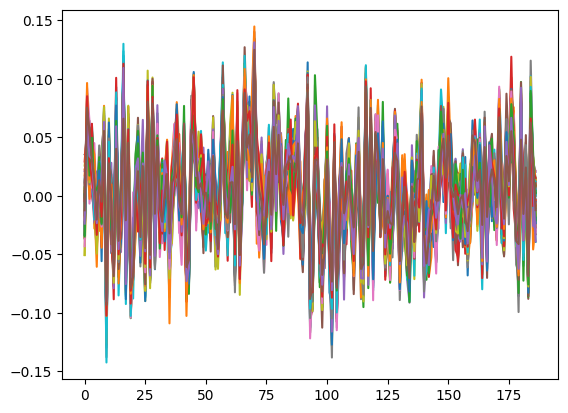

Итерация обучения по всем данным: 300 | Потери Дискриминатора: 0.3050698935985565 | Потери Генератора: 3.3783154487609863 | Время: 12:28:01


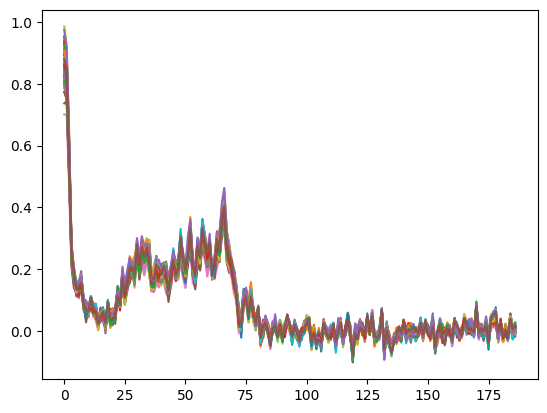

Итерация обучения по всем данным: 600 | Потери Дискриминатора: 0.36426204442977905 | Потери Генератора: 2.2473719120025635 | Время: 12:36:29


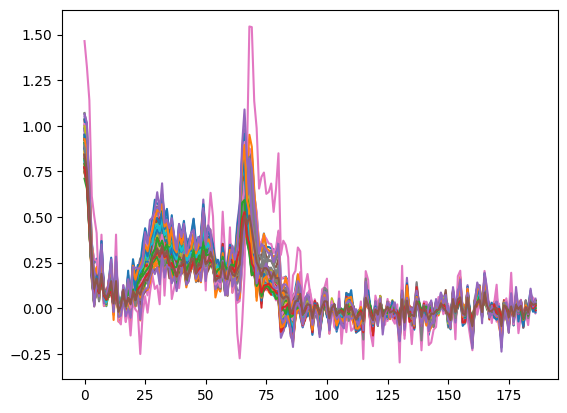

Итерация обучения по всем данным: 900 | Потери Дискриминатора: 0.33104076981544495 | Потери Генератора: 2.057194709777832 | Время: 12:44:53


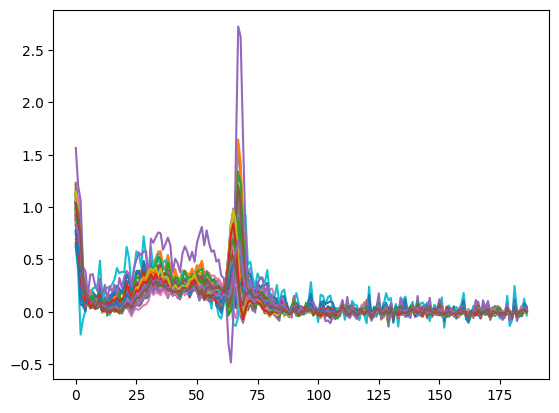

Итерация обучения по всем данным: 1200 | Потери Дискриминатора: 0.6146035194396973 | Потери Генератора: 2.0138423442840576 | Время: 12:53:22


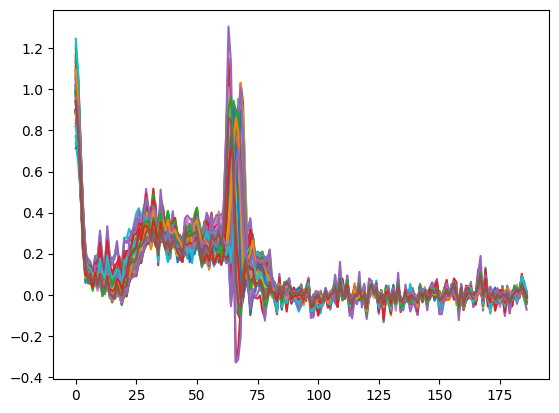

Итерация обучения по всем данным: 1500 | Потери Дискриминатора: 0.7540898323059082 | Потери Генератора: 2.1661083698272705 | Время: 13:01:46


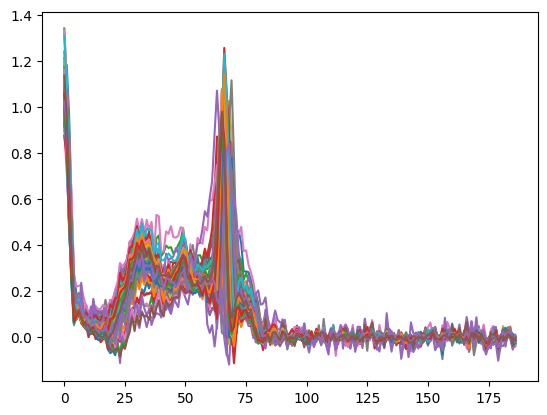

Итерация обучения по всем данным: 1800 | Потери Дискриминатора: 0.92462158203125 | Потери Генератора: 1.6060503721237183 | Время: 13:10:19


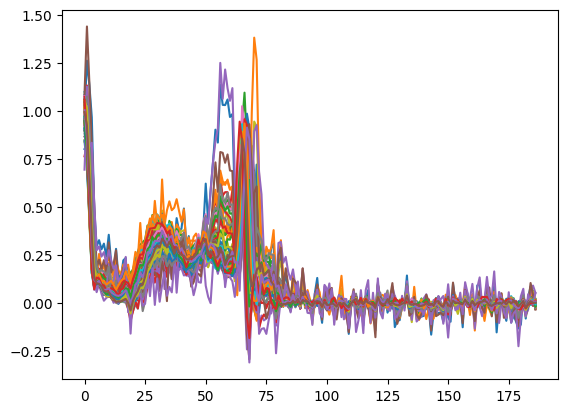

Итерация обучения по всем данным: 2100 | Потери Дискриминатора: 0.946661651134491 | Потери Генератора: 1.7976353168487549 | Время: 13:18:52


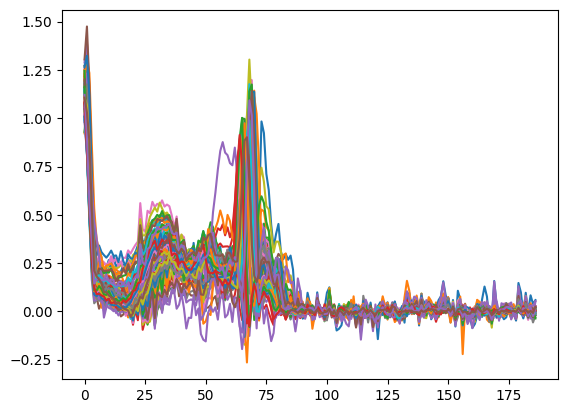

Итерация обучения по всем данным: 2400 | Потери Дискриминатора: 0.951551079750061 | Потери Генератора: 1.5053808689117432 | Время: 13:27:18


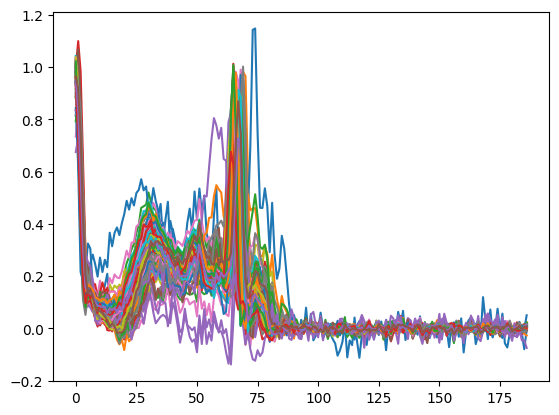

Итерация обучения по всем данным: 2700 | Потери Дискриминатора: 1.0170891284942627 | Потери Генератора: 1.5606449842453003 | Время: 13:35:51


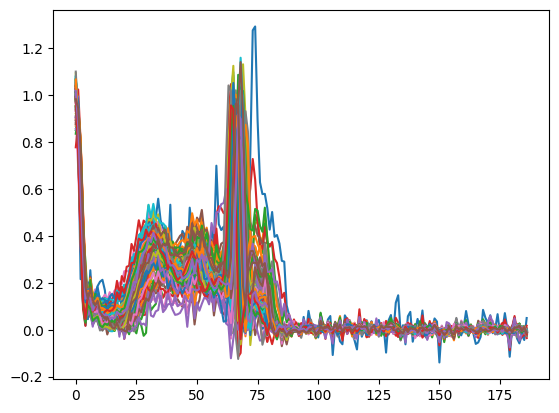

In [ ]:
trainer = Trainer(
    generator=g,
    discriminator=d,
    batch_size=96,
    num_epochs=3000,
    label='Слияние желудочкового и нормального сокращения'
)
trainer.run()

Этот код строит график, который отображает ошибки генератора и дискриминатора во время обучения GAN

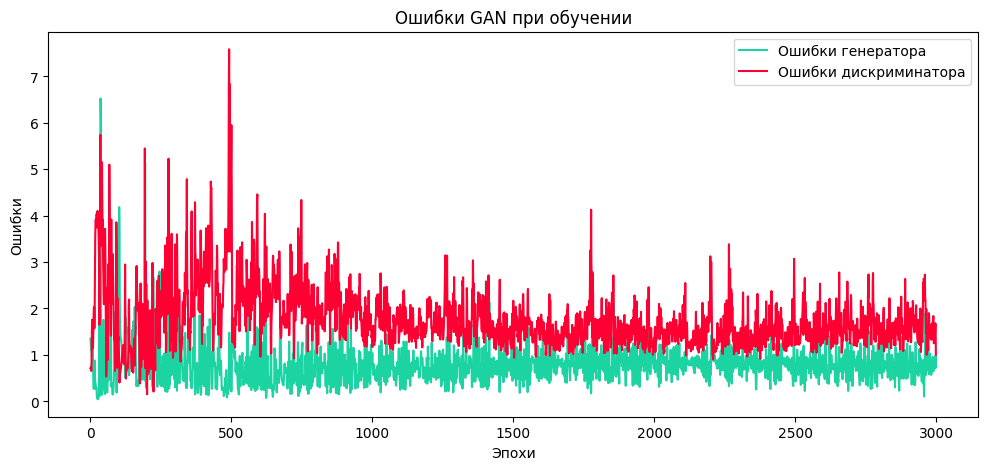

In [ ]:
plt.figure(figsize=(12, 5))
plt.title("Ошибки GAN при обучении")
plt.plot(trainer.d_errors, label='Ошибки генератора', c='#1CD3A2')
plt.plot(trainer.g_errors, label='Ошибки дискриминатора', c='#FF0033')
plt.xlabel("Эпохи")
plt.ylabel('Ошибки')
_ = plt.legend()
plt.savefig('Gan_Losses.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('Gan_Losses.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

Этот код генерирует график, сравнивающий настоящий сигнал с синтетическим, созданным с помощью генератора из модели GAN, для класса "Слияние желудочкового и нормального сокращения".

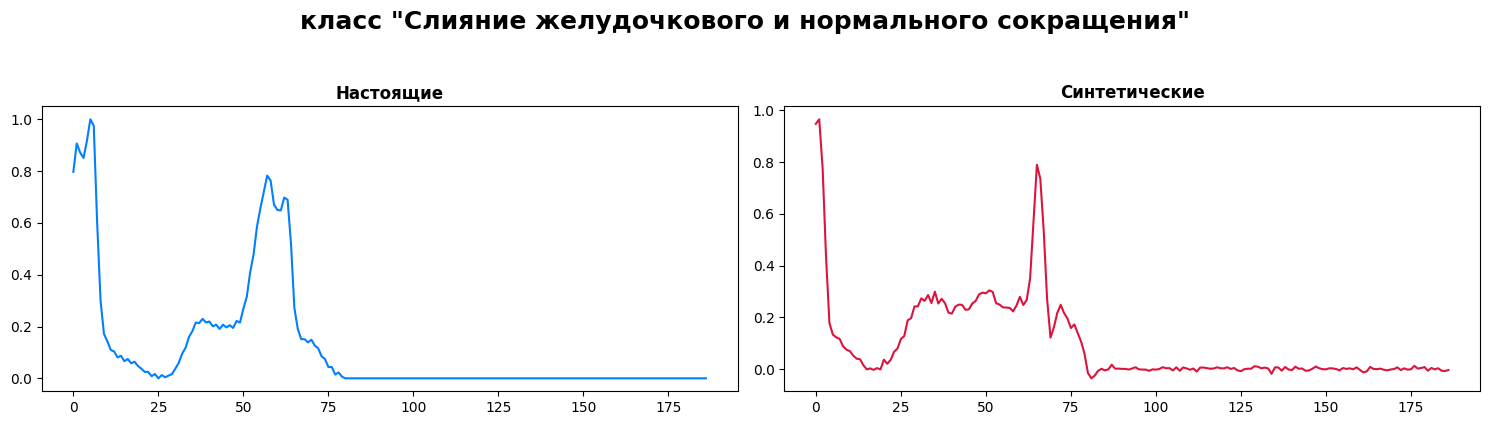

In [ ]:
df = pd.read_csv(config.csv_path)
df = df.loc[df['label'] == 'Слияние желудочкового и нормального сокращения']

# настоящий сигнал
N = 1
real_samples =  df.sample(N).values[:, :-2].transpose()

# синтетический сигнал
fake = trainer.netG(trainer.fixed_noise)
index = np.random.choice(fake.shape[0], N, replace=False)
synthetic_samples = fake.detach().cpu().squeeze(1).numpy()[index].transpose()

fig, axs = plt.subplots(1, 2, figsize=(15, 4))


axs[0].plot(real_samples, c='#007FFF')
axs[0].set_title("Настоящие", fontsize= 12, weight="bold")


axs[1].plot(synthetic_samples, c="crimson")
axs[1].set_title("Синтетические", fontsize= 12, weight="bold")

plt.suptitle('класс "Слияние желудочкового и нормального сокращения"', fontsize=18, y=1.05, weight="bold")
plt.tight_layout()
plt.savefig('Fusion_of_ventricular_and_normal.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('Fusion_of_ventricular_and_normal.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

# Заключение

Поскольку это стандартный процесс обучения модели GAN, мы можем наблюдать, что Генератор выдает преимущественно доминирующие типы сигналов. А именно, у нас есть в общей сложности 803 сигнала класса «Слияние желудочкового и нормального сокращения», большинство из которых очень похожи, и именно их научилась генерировать модель GAN.